In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [5]:
df = pd.read_pickle('../../../data/processed/state0/left_ios_df.pkl')
print(df.shape)

(8529, 8)


In [6]:
df.columns

Index(['eventDurationSeconds', 'eventStartSpeed', 'eventEndSpeed',
       'gpsMedianLateralAccel', 'bearing_angular_change_per_second',
       'bearingAngleChange', 'gps_radius', 'aggressive'],
      dtype='object')

In [7]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [8]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(df)

/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/connieyang/Documents/GitHub/ARITY-BTT-PROJECT-1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [9]:
clusterer.labels_

array([4, 4, 4, ..., 4, 4, 4], shape=(8529,))

In [10]:
clusterer.labels_.max()

np.int64(4)

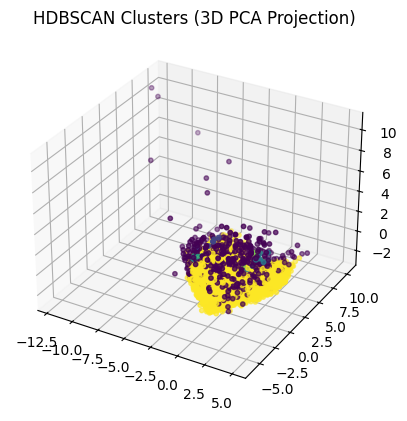

In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusterer.labels_, s=10)
plt.title("HDBSCAN Clusters (3D PCA Projection)")
plt.show()

In [12]:
df['cluster']   = clusterer.labels_
df.head()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive,cluster
7,6.989070,9.819660,9.281934,0.847049,15.546200,116.756195,23.539900,0,4
8,1.952297,8.802840,8.186321,1.902596,26.772104,89.652710,7.038807,0,4
9,1.952344,14.564783,17.088364,3.850459,28.404854,89.339260,11.009399,0,4
42,0.923000,16.396770,16.396770,3.241720,20.187233,50.679900,17.821848,0,4
44,2.928000,17.697014,17.668453,1.070423,8.426376,33.151783,53.600290,0,4


In [13]:
df.groupby('cluster').mean()

,eventDurationSeconds,eventStartSpeed,eventEndSpeed,gpsMedianLateralAccel,bearing_angular_change_per_second,bearingAngleChange,gps_radius,aggressive
cluster,,,,,,,,
-1,6.480422,12.779302,15.834255,1.978286,21.906924,132.769639,33.414674,0.007042
0,12.813475,6.464003,13.770510,1.493119,10.884123,243.383554,15.944790,0.000000
1,10.683573,17.413058,22.705311,1.552769,10.841779,130.253109,59.617149,0.000000
2,6.795794,5.561377,8.812517,1.318587,23.142049,204.921148,6.354739,0.000000
3,8.392793,22.250962,23.296901,2.227963,14.328940,127.665975,40.810712,0.000000
4,2.798810,12.501795,14.467691,2.429451,23.507382,77.237064,20.620578,0.000000


cluster
-1    0.000000
 0    0.981086
 1    0.973589
 2    0.997724
 3    0.990511
 4    0.992331
Name: probability, dtype: float64


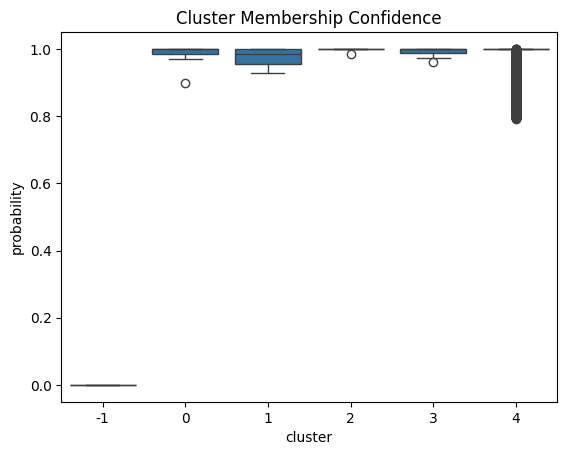

In [14]:
df['probability'] = clusterer.probabilities_
print(df.groupby('cluster')['probability'].mean())

sns.boxplot(x='cluster', y='probability', data=df)
plt.title("Cluster Membership Confidence")
plt.show()


In [15]:
df['cluster'].value_counts()

cluster
 4    7930
-1     568
 1      11
 0       7
 3       7
 2       6
Name: count, dtype: int64

In [16]:
mask = clusterer.labels_ != -1
score = silhouette_score(X_scaled[mask], clusterer.labels_[mask])
print("Silhouette Score (excluding noise):", score)


Silhouette Score (excluding noise): 0.19720888533288375
